<a href="https://colab.research.google.com/github/islak/phishing-detection/blob/main/phishing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
!pip install kaggle

In [41]:
from kaggle.api.kaggle_api_extended import KaggleApi
api = KaggleApi()
api.authenticate()


In [42]:
import os
import pandas as pd

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 700 ~/.kaggle/kaggle.json

In [43]:
!kaggle datasets download -d shashwatwork/web-page-phishing-detection-dataset

Dataset URL: https://www.kaggle.com/datasets/shashwatwork/web-page-phishing-detection-dataset
License(s): Attribution 4.0 International (CC BY 4.0)
web-page-phishing-detection-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


# Loading Data

In [62]:
import pandas as pd

df = pd.read_csv('dataset_phishing.csv')
print(df.head())

                                                 url  length_url  \
0              http://www.crestonwood.com/router.php          37   
1  http://shadetreetechnology.com/V4/validation/a...          77   
2  https://support-appleld.com.secureupdate.duila...         126   
3                                 http://rgipt.ac.in          18   
4  http://www.iracing.com/tracks/gateway-motorspo...          55   

   length_hostname  ip  nb_dots  nb_hyphens  nb_at  nb_qm  nb_and  nb_or  ...  \
0               19   0        3           0      0      0       0      0  ...   
1               23   1        1           0      0      0       0      0  ...   
2               50   1        4           1      0      1       2      0  ...   
3               11   0        2           0      0      0       0      0  ...   
4               15   0        2           2      0      0       0      0  ...   

   domain_in_title  domain_with_copyright  whois_registered_domain  \
0                0                

#Exploring dataset

In [63]:
df.shape

(11430, 89)

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11430 entries, 0 to 11429
Data columns (total 89 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   url                         11430 non-null  object 
 1   length_url                  11430 non-null  int64  
 2   length_hostname             11430 non-null  int64  
 3   ip                          11430 non-null  int64  
 4   nb_dots                     11430 non-null  int64  
 5   nb_hyphens                  11430 non-null  int64  
 6   nb_at                       11430 non-null  int64  
 7   nb_qm                       11430 non-null  int64  
 8   nb_and                      11430 non-null  int64  
 9   nb_or                       11430 non-null  int64  
 10  nb_eq                       11430 non-null  int64  
 11  nb_underscore               11430 non-null  int64  
 12  nb_tilde                    11430 non-null  int64  
 13  nb_percent                  114

In [65]:
df.describe()

,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,nb_eq,...,empty_title,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank
count,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.0,11430.000000,...,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,1.143000e+04,11430.000000,11430.000000,11430.000000
mean,61.126684,21.090289,0.150569,2.480752,0.997550,0.022222,0.141207,0.162292,0.0,0.293176,...,0.124759,0.775853,0.439545,0.072878,492.532196,4062.543745,8.567566e+05,0.020122,0.533946,3.185739
std,55.297318,10.777171,0.357644,1.369686,2.087087,0.155500,0.364456,0.821337,0.0,0.998317,...,0.330460,0.417038,0.496353,0.259948,814.769415,3107.784600,1.995606e+06,0.140425,0.498868,2.536955
min,12.000000,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,-1.000000,-12.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,33.000000,15.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,1.000000,0.000000,0.000000,84.000000,972.250000,0.000000e+00,0.000000,0.000000,1.000000
50%,47.000000,19.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,1.000000,0.000000,0.000000,242.000000,3993.000000,1.651000e+03,0.000000,1.000000,3.000000
75%,71.000000,24.000000,0.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,1.000000,1.000000,0.000000,449.000000,7026.750000,3.738455e+05,0.000000,1.000000,5.000000
max,1641.000000,214.000000,1.000000,24.000000,43.000000,4.000000,3.000000,19.000000,0.0,19.000000,...,1.000000,1.000000,1.000000,1.000000,29829.000000,12874.000000,1.076799e+07,1.000000,1.000000,10.000000


In [66]:
#missing values
df.isnull().sum()

,0
url,0
length_url,0
length_hostname,0
ip,0
nb_dots,0
...,...
web_traffic,0
dns_record,0
google_index,0
page_rank,0


Perfectly balanced dataset of phishing vs legitimate urls, oversample/undersampling adjustment not required.

<Axes: title={'center': 'Phishing vs. Legitimate'}, xlabel='status'>

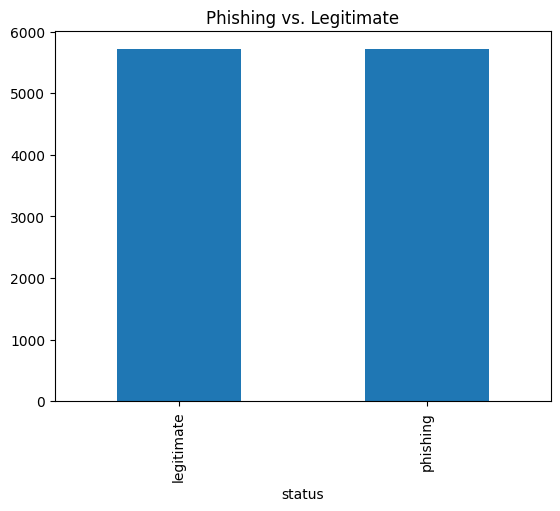

In [67]:
df['status'].value_counts().plot(kind='bar', title='Phishing vs. Legitimate')


Convert status column to numeric

In [68]:
df['status'] = df['status'].map({'phishing': 1, 'safe': 0})

In [70]:
df['status'].head()

,status
0,NaN
1,1.0
2,1.0
3,NaN
4,NaN


In [71]:
df['status'] = df['status'].fillna(0)
df['status'].head()

,status
0,0.0
1,1.0
2,1.0
3,0.0
4,0.0


Identify strongest related numerical data to status column

In [72]:
numeric_df = df.select_dtypes(include=['number'])
corr = numeric_df.corr()
phishing_corr = corr['status'].sort_values(ascending=False)
print(phishing_corr)

status                  1.000000
google_index            0.731171
ratio_digits_url        0.356395
domain_in_title         0.342807
phish_hints             0.335393
                          ...   
ratio_nullHyperlinks         NaN
ratio_intRedirection         NaN
ratio_intErrors              NaN
submit_email                 NaN
sfh                          NaN
Name: status, Length: 88, dtype: float64


# Feature Engineering

In [73]:
df = df.drop('url', axis=1)

scale values into [0,1] to avoid bias to larger vals

In [74]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[['length_url', 'length_hostname']] = scaler.fit_transform(df[['length_url', 'length_hostname']])

X is feature matrix. Y is target var (status). Calculate mutual info between X and Y (finds linear and non-linear relationships unlike corr analysis which can only find linear)

In [75]:
from sklearn.feature_selection import mutual_info_classif
X = df.drop('status', axis=1)
y = df['status']
importance = mutual_info_classif(X, y)
feature_importance = pd.Series(importance, index=X.columns).sort_values(ascending=False)
print(feature_importance)

web_traffic            0.299771
google_index           0.297361
domain_age             0.281331
ratio_intHyperlinks    0.238390
ratio_extHyperlinks    0.237063
                         ...   
sfh                    0.000000
nb_redirection         0.000000
nb_colon               0.000000
login_form             0.000000
nb_or                  0.000000
Length: 87, dtype: float64
